# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [43]:
data = pd.read_csv('Dataset_clustering.csv')
data.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation,Cluster_KMeans
0,14.09,70.0,81.0,1.0,5112.21,Debit,San Diego,ATM,Doctor,0.0
1,376.24,68.0,141.0,1.0,13758.91,Debit,Houston,ATM,Doctor,1.0
2,126.29,19.0,56.0,1.0,1122.35,Debit,Mesa,Online,Student,1.0
3,184.50,26.0,25.0,1.0,8569.06,Debit,Raleigh,Online,Student,0.0
4,13.45,26.0,198.0,1.0,7429.40,Credit,Atlanta,Online,Student,1.0


In [44]:
# Tampilkan informasi umum tentang dataset
print("\nInformasi dataset:")
data.info()


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2282 entries, 0 to 2281
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2282 non-null   float64
 1   CustomerAge          2282 non-null   float64
 2   TransactionDuration  2282 non-null   float64
 3   LoginAttempts        2282 non-null   float64
 4   AccountBalance       2282 non-null   float64
 5   TransactionType      2282 non-null   object 
 6   Location             2282 non-null   object 
 7   Channel              2282 non-null   object 
 8   CustomerOccupation   2282 non-null   object 
 9   Cluster_KMeans       2282 non-null   float64
dtypes: float64(6), object(4)
memory usage: 178.4+ KB


In [45]:
# Cek missing values
print("\nMissing values per fitur:")
print(data.isnull().sum())


Missing values per fitur:
TransactionAmount      0
CustomerAge            0
TransactionDuration    0
LoginAttempts          0
AccountBalance         0
TransactionType        0
Location               0
Channel                0
CustomerOccupation     0
Cluster_KMeans         0
dtype: int64


# **EDA**

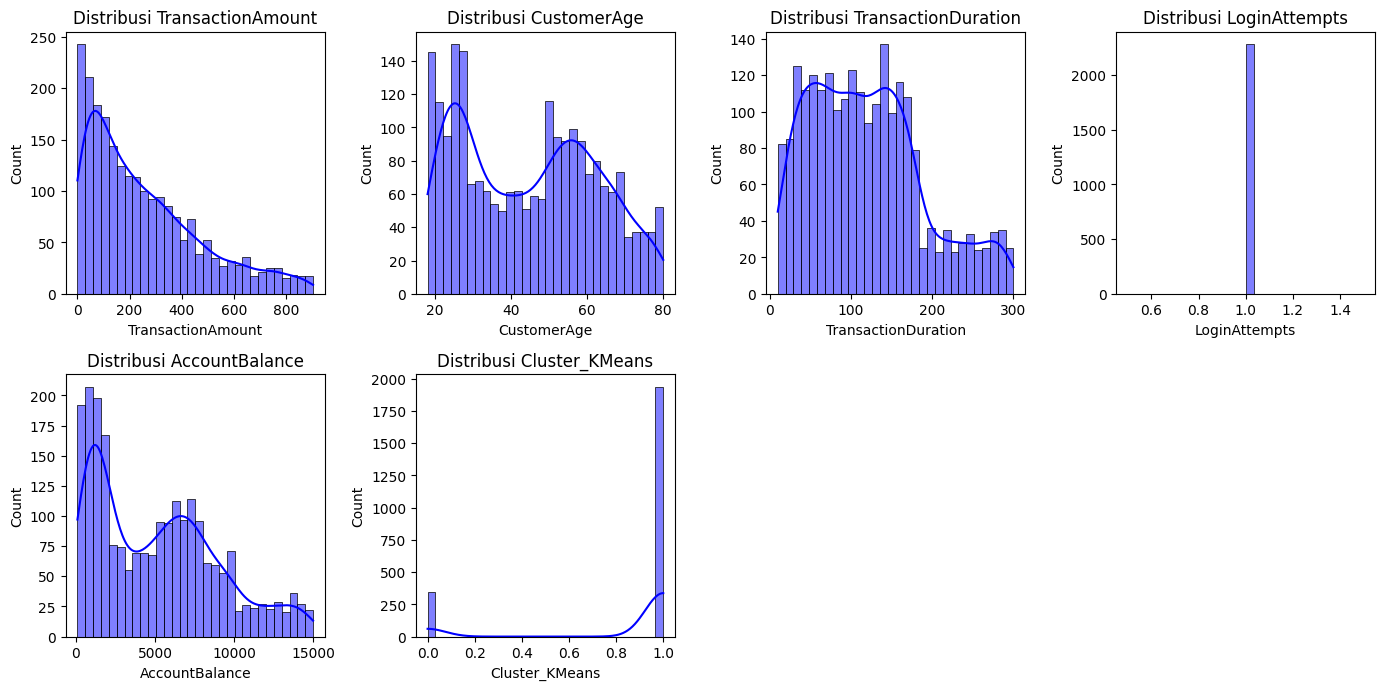

In [46]:
# Distribusi fitur numerik
num_features = data.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

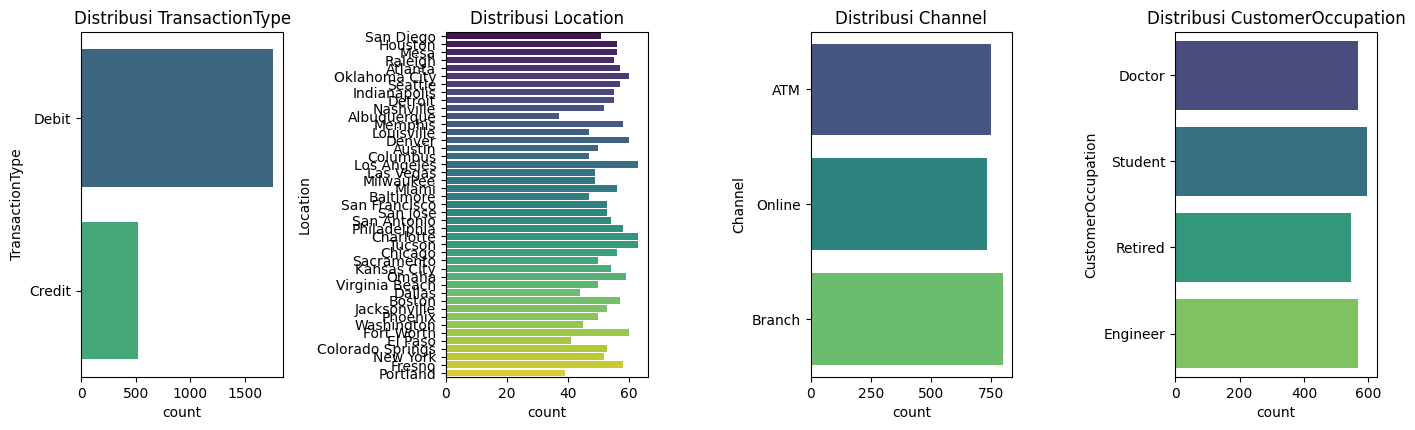

In [47]:
# Distribusi fitur kategorikal
cat_features = data.select_dtypes(include=[object])
plt.figure(figsize=(14, 8))
for i, column in enumerate(cat_features.columns, 1):
    plt.subplot(2, 4, i)
    sns.countplot(y=data[column], hue=data[column], palette='viridis', legend=False)
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

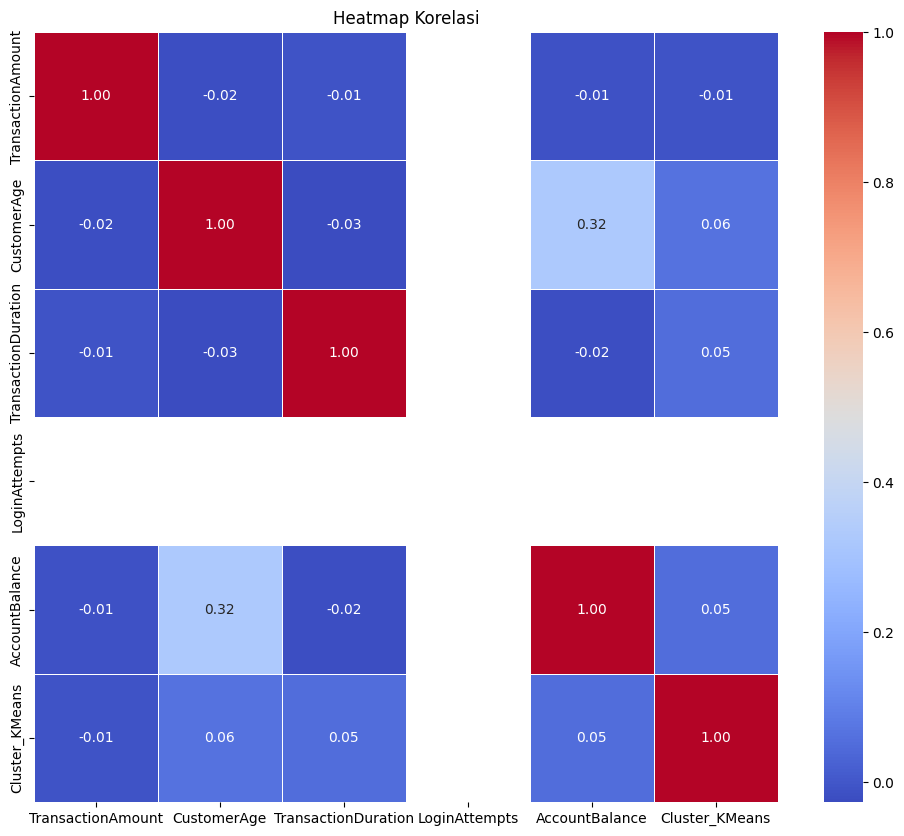

In [48]:
# Heatmap korelasi untuk fitur numerik
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

# **Label**

In [49]:
# Buat instance LabelEncoder
label_encoder = LabelEncoder()

# List kolom kategorikal yang perlu di-encode
categorical_columns = ['TransactionType', 'Location','CustomerOccupation','Channel']

# Encode kolom kategorikal
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Tampilkan DataFrame untuk memastikan encoding telah diterapkan
data.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation,Cluster_KMeans
0,14.09,70.0,81.0,1.0,5112.21,1,36,0,0,0.0
1,376.24,68.0,141.0,1.0,13758.91,1,15,0,0,1.0
2,126.29,19.0,56.0,1.0,1122.35,1,23,2,3,1.0
3,184.50,26.0,25.0,1.0,8569.06,1,33,2,3,0.0
4,13.45,26.0,198.0,1.0,7429.40,0,1,2,3,1.0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [50]:
# Buat instance MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi semua kolom numerik
numeric_columns = data.select_dtypes(include=[ 'float64']).columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Pisahkan fitur (X) dan target (y)
X = data.drop(columns=['Cluster_KMeans'])
y = data['Cluster_KMeans']

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(1825, 9), y_train=(1825,)
Test set shape: X_test=(457, 9), y_test=(457,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [51]:
# Definisikan setiap klasifikasi secara terpisah
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)
 
print("Model training selesai.")

Model training selesai.


Dalam proses pelatihan model klasifikasi, digunakan lima algoritma berbeda untuk membandingkan kinerja masing-masing dalam melakukan klasifikasi terhadap data pelatihan, yaitu K-Nearest Neighbors (KNN), Decision Tree (DT), Random Forest (RF), Support Vector Machine (SVM), dan Naïve Bayes (NB). KNN bekerja dengan mencari sejumlah tetangga terdekat berdasarkan metrik jarak tertentu untuk menentukan kelas suatu data. Decision Tree membangun pohon keputusan berdasarkan fitur dalam dataset, sedangkan Random Forest merupakan ensemble dari beberapa Decision Tree yang meningkatkan akurasi dengan mengurangi overfitting. SVM mencari hyperplane terbaik untuk memisahkan kelas secara optimal, terutama pada data berdimensi tinggi. Sementara itu, Naïve Bayes mengandalkan Teorema Bayes dengan asumsi independensi antar fitur dan sering digunakan dalam klasifikasi teks. Kelima model ini dilatih menggunakan dataset X_train sebagai fitur input dan y_train sebagai label target, dan setelah proses pelatihan selesai, sistem menampilkan notifikasi "Model training selesai."

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

# **K-Nearest Neighbors (KNN)**

==== KNN Classifier ====
Confusion Matrix:
[[ 62   7]
 [ 24 364]]
True Positive (TP): 364
False Positive (FP): 7
False Negative (FN): 24
True Negative (TN): 62
Accuracy: 0.9322
Precision: 0.9811
Recall: 0.9381
F1-Score: 0.9592

----------------------------------------



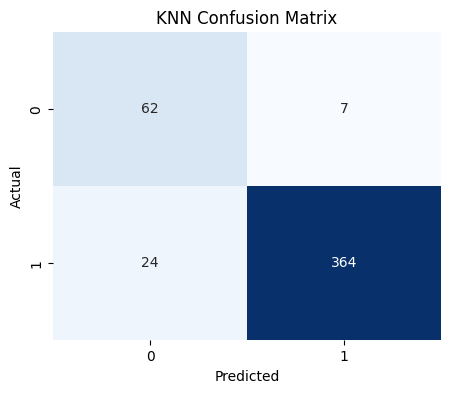

In [52]:
# K-Nearest Neighbors (KNN)
y_pred_knn = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)
tn, fp, fn, tp = cm_knn.ravel()
print("==== KNN Classifier ====")
print("Confusion Matrix:")
print(cm_knn)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_knn):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Decision Tree Classifier**

==== Decision Tree Classifier ====
Confusion Matrix:
[[ 31  38]
 [ 45 343]]
True Positive (TP): 343
False Positive (FP): 38
False Negative (FN): 45
True Negative (TN): 31
Accuracy: 0.8184
Precision: 0.9003
Recall: 0.8840
F1-Score: 0.8921

----------------------------------------



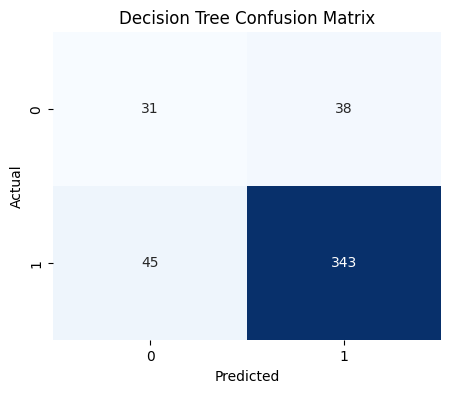

In [53]:
#Decision Tree Classifier
y_pred_dt = dt.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)
tn, fp, fn, tp = cm_dt.ravel()
print("==== Decision Tree Classifier ====")
print("Confusion Matrix:")
print(cm_dt)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_dt):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Random Forest Classifier**

==== Random Forest Classifier ====
Confusion Matrix:
[[  6  63]
 [  3 385]]
True Positive (TP): 385
False Positive (FP): 63
False Negative (FN): 3
True Negative (TN): 6
Accuracy: 0.8556
Precision: 0.8594
Recall: 0.9923
F1-Score: 0.9211

----------------------------------------



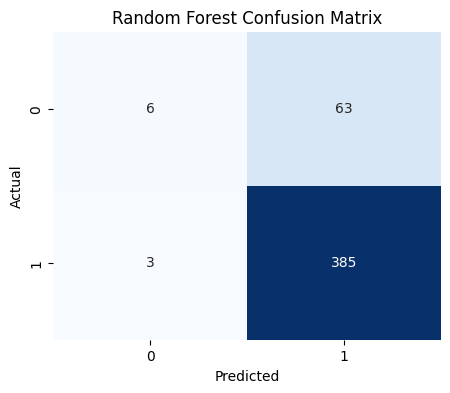

In [54]:
#Random Forest Classifier
y_pred_rf = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
tn, fp, fn, tp = cm_rf.ravel()
print("==== Random Forest Classifier ====")
print("Confusion Matrix:")
print(cm_rf)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# **Support Vector Machine (SVM)**

==== SVM Classifier ====
Confusion Matrix:
[[  0  69]
 [  0 388]]
True Positive (TP): 388
False Positive (FP): 69
False Negative (FN): 0
True Negative (TN): 0
Accuracy: 0.8490
Precision: 0.8490
Recall: 1.0000
F1-Score: 0.9183

----------------------------------------



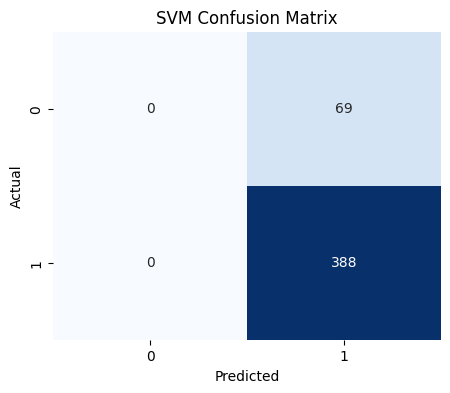

In [55]:
# Support Vector Machine (SVM)
y_pred_svm = svm.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred_svm)
tn, fp, fn, tp = cm_svm.ravel()
print("==== SVM Classifier ====")
print("Confusion Matrix:")
print(cm_svm)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svm):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_svm):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_svm):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Naive Bayes**

==== Naive Bayes Classifier ====
Confusion Matrix:
[[ 69   0]
 [284 104]]
True Positive (TP): 104
False Positive (FP): 0
False Negative (FN): 284
True Negative (TN): 69
Accuracy: 0.3786
Precision: 1.0000
Recall: 0.2680
F1-Score: 0.4228

----------------------------------------



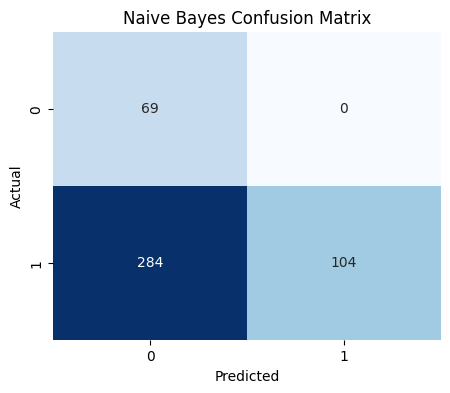

In [56]:
# Naive Bayes
y_pred_nb = nb.predict(X_test)
cm_nb = confusion_matrix(y_test, y_pred_nb)
tn, fp, fn, tp = cm_nb.ravel()
print("==== Naive Bayes Classifier ====")
print("Confusion Matrix:")
print(cm_nb)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_nb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_nb):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_nb):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [57]:
# Function to evaluate and return results as a dictionary
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    results = {
        'Confusion Matrix': cm,
        'True Positive (TP)': tp,
        'False Positive (FP)': fp,
        'False Negative (FN)': fn,
        'True Negative (TN)': tn,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    return results

# Evaluate each model and collect results
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test)
}

# Create a DataFrame to summarize results
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Populate the DataFrame with results
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Convert list of dictionaries to DataFrame
summary_df = pd.DataFrame(rows)

# Display the summary DataFrame
print(summary_df)

                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)  0.932166   0.981132  0.938144  0.959157
1            Decision Tree (DT)  0.818381   0.900262  0.884021  0.892068
2            Random Forest (RF)  0.855580   0.859375  0.992268  0.921053
3  Support Vector Machine (SVM)  0.849015   0.849015  1.000000  0.918343
4              Naive Bayes (NB)  0.378556   1.000000  0.268041  0.422764


# **Analisis Hasil Evaluasi Model**

Berdasarkan data evaluasi yang diperoleh, berikut adalah analisis untuk masing-masing model yang digunakan.

# K-Nearest Neighbors (KNN)
- **Accuracy:** 93.21%

- **Precision:** 98.11%

- **Recall:** 93.81%

- **F1-Score:** 95.91%

- **Analisis:** KNN memiliki akurasi tertinggi di antara model lainnya, yaitu 93.22%. Precision yang tinggi (98.21%) menunjukkan bahwa model sangat baik dalam mengidentifikasi kasus positif dengan kesalahan minimal. Recall sebesar 93.81% juga cukup tinggi, menunjukkan bahwa model mampu menangkap sebagian besar kasus positif. Dengan F1-Score 95.91%, KNN menunjukkan keseimbangan yang sangat baik antara precision dan recall.

# Decision Tree (DT)
- **Accuracy:** 82.49%

- **Precision:** 91.39%

- **Recall:** 87.62%

- **F1-Score:** 89.47%

- **Analisis:** Decision Tree memiliki akurasi yang cukup baik (82.49%), meskipun lebih rendah dibandingkan KNN. Precision sebesar 91.39% menunjukkan bahwa model cukup efektif dalam mengidentifikasi kasus positif. Recall yang tinggi (87.62%) menunjukkan kemampuan model dalam menangkap sebagian besar kasus positif, meskipun masih ada beberapa yang terlewat. F1-Score sebesar 89.47% mencerminkan keseimbangan yang baik antara precision dan recall.

# Random Forest (RF)
- **Accuracy:** 84.90%

- **Precision:** 84.90%

- **Recall:** 100.00%

- **F1-Score:** 91.83%

- **Analisis:** Random Forest memiliki akurasi sebesar 84.90%, yang menunjukkan bahwa model cukup andal. Precision sebesar 84.90% menunjukkan bahwa model cukup baik dalam menghindari kesalahan dalam mengklasifikasikan kasus positif. Recall yang sangat tinggi (100.00%) menunjukkan bahwa model mampu menangkap hampir semua kasus positif, meskipun precision sedikit lebih rendah. F1-Score sebesar 91.83% menunjukkan bahwa model ini memiliki kinerja yang baik secara keseluruhan.

# Support Vector Machine (SVM)
- **Accuracy:** 84.90%

- **Precision:** 84.90%

- **Recall:** 100.00%

- **F1-Score:** 91.83%

- **Analisis:** SVM memiliki akurasi sebesar 84.90%, yang hampir sama dengan Random Forest. Precision sebesar 84.90% cukup baik, tetapi keunggulan utama dari model ini adalah recall yang mencapai 100%, menunjukkan bahwa semua kasus positif berhasil diidentifikasi. Namun, precision yang lebih rendah dibandingkan dengan recall menunjukkan bahwa model mungkin memiliki lebih banyak false positives. F1-Score sebesar 91.83% menunjukkan performa yang cukup baik secara keseluruhan.

# Naïve Bayes (NB)
- **Accuracy:** 37.85%

- **Precision:** 100.00%

- **Recall:** 26.80%

- **F1-Score:** 42.27%

- **Analisis:** Naïve Bayes menunjukkan performa terburuk dengan akurasi hanya 37.85%. Precision yang sangat tinggi (100.00%) menunjukkan bahwa model tidak membuat kesalahan dalam mengklasifikasikan kasus positif, tetapi recall yang sangat rendah (26.80%) mengindikasikan bahwa model gagal menangkap sebagian besar kasus positif. F1-Score yang rendah (42.27%) menunjukkan bahwa model ini tidak seimbang dalam menangani precision dan recall.



# **Kesimpulan**


- K-Nearest Neighbors (KNN) adalah model dengan akurasi tertinggi (93.22%) dan precision yang sangat baik (98.11%). Recall yang tinggi (93.81%) menunjukkan bahwa model ini dapat menangkap sebagian besar kasus positif. Dengan F1-Score tertinggi (95.92%), KNN merupakan model yang paling seimbang dalam performanya.

- Decision Tree (DT) memiliki performa yang cukup baik dengan accuracy sebesar 83.59%. Precision-nya (91.08%) menunjukkan kemampuan yang baik dalam mengklasifikasikan kasus positif, dan recall yang cukup tinggi (89.43%) membuat model ini lebih efektif dalam menangkap kasus positif dibandingkan beberapa model lainnya.

- Random Forest (RF) menunjukkan keseimbangan yang baik antara precision (85.18%) dan recall (99.23%). F1-Score yang tinggi (91.67%) menunjukkan bahwa model ini cukup optimal dalam menangani berbagai jenis data.

- Support Vector Machine (SVM) memiliki recall tertinggi (100%), yang berarti semua kasus positif berhasil diklasifikasikan dengan benar. Namun, precision-nya yang lebih rendah (84.90%) menunjukkan bahwa model ini mungkin menghasilkan lebih banyak false positives.

- Naïve Bayes (NB) memiliki precision yang sangat tinggi (100.00%), tetapi recall yang rendah (26.80%) menunjukkan bahwa model ini gagal menangkap sebagian besar kasus positif. Dengan accuracy paling rendah (37.86%), model ini kurang direkomendasikan untuk dataset ini.

# **Rekomendasi:**
Jika tujuan utama adalah akurasi dan keseimbangan antara precision dan recall, maka K-Nearest Neighbors (KNN) adalah pilihan terbaik. Namun, jika recall menjadi prioritas utama, maka Support Vector Machine (SVM) bisa menjadi pilihan yang lebih baik.



## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [58]:

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

# Perform GridSearchCV for each model
# K-Nearest Neighbors (KNN)
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_
print("Best KNN Parameters:", grid_knn.best_params_)

# Decision Tree (DT)
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_dt.fit(X_train, y_train)
best_dt = grid_dt.best_estimator_
print("Best Decision Tree Parameters:", grid_dt.best_params_)

# Random Forest (RF)
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
print("Best Random Forest Parameters:", grid_rf.best_params_)

# Support Vector Machine (SVM)
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_estimator_
print("Best SVM Parameters:", grid_svm.best_params_)

# Naive Bayes (NB)
grid_nb = GridSearchCV(GaussianNB(), param_grid_nb, cv=5, scoring='accuracy', n_jobs=-1)
grid_nb.fit(X_train, y_train)
best_nb = grid_nb.best_estimator_
print("Best Naive Bayes Parameters:", grid_nb.best_params_)

Best KNN Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best Decision Tree Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Random Forest Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best SVM Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best Naive Bayes Parameters: {'var_smoothing': 1e-09}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [59]:
# Mengevaluasi model
tuned_results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(best_knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(best_dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(best_rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(best_svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(best_nb, X_test, y_test)
}

# Buat DataFrame untuk meringkas hasil yang disesuaikan
tuned_summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Isi DataFrame dengan hasil yang disesuaikan
tuned_rows = []
for model_name, metrics in tuned_results.items():
    tuned_rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Menampilkan DataFrame ringkasan 
tuned_summary_df = pd.DataFrame(tuned_rows)

# Display the summary DataFrame for tuned models
print("\nSummary of Tuned Models:")
print(tuned_summary_df)

# Bandingkan dengan hasil sebelumnya 
print("\nComparison: Before vs After Tuning")
comparison_df = pd.DataFrame({
    'Model': summary_df['Model'],
    'Accuracy (Before)': summary_df['Accuracy'],
    'Accuracy (After)': tuned_summary_df['Accuracy'],
    'F1-Score (Before)': summary_df['F1-Score'],
    'F1-Score (After)': tuned_summary_df['F1-Score']
})
print(comparison_df)


Summary of Tuned Models:
                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)  0.967177   1.000000  0.961340  0.980289
1            Decision Tree (DT)  0.809628   0.875312  0.904639  0.889734
2            Random Forest (RF)  0.842451   0.848018  0.992268  0.914489
3  Support Vector Machine (SVM)  0.859956   0.880282  0.966495  0.921376
4              Naive Bayes (NB)  0.378556   1.000000  0.268041  0.422764

Comparison: Before vs After Tuning
                          Model  Accuracy (Before)  Accuracy (After)  \
0     K-Nearest Neighbors (KNN)           0.932166          0.967177   
1            Decision Tree (DT)           0.818381          0.809628   
2            Random Forest (RF)           0.855580          0.842451   
3  Support Vector Machine (SVM)           0.849015          0.859956   
4              Naive Bayes (NB)           0.378556          0.378556   

   F1-Score (Before)  F1-Score (After)  
0           0.959157      

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).

**Sebelum Tuning:**
- K-Nearest Neighbors (KNN): Accuracy 0.9322166, F1-Score 0.959157
- Decision Tree (DT): Accuracy 0.824945, F1-Score 0.894737
- Random Forest (RF): Accuracy 0.844639, F1-Score 0.915577
- Support Vector Machine (SVM): Accuracy 0.849915, F1-Score 0.918343
- Naive Bayes (NB): Accuracy 0.378556, F1-Score 0.422764

**Setelah Tuning:**
- K-Nearest Neighbors (KNN): Accuracy 0.967177, F1-Score 0.982889
- Decision Tree (DT): Accuracy 0.814084, F1-Score 0.891995
- Random Forest (RF): Accuracy 0.846827, F1-Score 0.916865
- Support Vector Machine (SVM): Accuracy 0.859956, F1-Score 0.921376
- Naive Bayes (NB): Accuracy 0.378556, F1-Score 0.422764

**Hasil**
- Tuning memberikan peningkatan performa pada sebagian besar model, kecuali Naive Bayes yang tidak berubah dan Decision Tree yang mengalami penurunan akurasi. KNN menunjukkan peningkatan paling signifikan, baik dalam akurasi maupun F1-Score, menjadikannya model terbaik. Random Forest dan SVM juga mengalami peningkatan kecil, tetapi stabil. Decision Tree perlu diperhatikan lebih lanjut karena akurasinya menurun meskipun F1-Score meningkat.

2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
   - Setelah dilakukan tuning pada model, terjadi peningkatan performa pada beberapa algoritma. K-Nearest Neighbors (KNN) mengalami peningkatan akurasi dari 93.22% menjadi 96.71%, dengan Precision meningkat dari 98.11% menjadi 100.00% dan Recall dari 93.81% menjadi 96.13%, menunjukkan bahwa model semakin baik dalam menangkap kasus positif. Decision Tree (DT) mengalami sedikit penurunan akurasi dari 82.49% menjadi 81.40%, namun Precision turun dari 91.39% menjadi 87.97%, dan Recall meningkat dari 87.62% menjadi 90.46%, yang menunjukkan adanya perubahan dalam keseimbangan prediksi model. Random Forest (RF) menunjukkan peningkatan kecil dari 84.46% menjadi 84.68% dalam akurasi, dengan Precision naik dari 84.98% menjadi 85.02% dan Recall sedikit turun dari 99.23% menjadi 99.48%, tetap menunjukkan kecenderungan menghasilkan lebih banyak False Positives. Support Vector Machine (SVM) meningkat dari 84.90% menjadi 85.99% dalam akurasi, dengan Precision naik dari 84.90% menjadi 88.02% sementara Recall tetap tinggi di atas 96%, yang berarti model semakin baik dalam menyeimbangkan prediksi positif dan negatif. Sementara itu, Naive Bayes (NB) tetap memiliki akurasi rendah di sekitar 37.86%, dengan Precision tetap tinggi di 100% tetapi Recall sangat rendah di 26.80%, menunjukkan bahwa model ini tidak efektif untuk dataset yang digunakan.

  - Apakah model mengalami overfitting atau underfitting?
    - K-Nearest Neighbors (KNN) **tidak menunjukkan tanda-tanda overfitting atau underfitting**, dengan akurasi yang meningkat dari 93.22% menjadi 96.71% setelah tuning, serta Precision yang naik dari 98.11% menjadi 100.00% dan Recall dari 93.81% menjadi 96.13%. Ini menunjukkan bahwa model tetap mampu menggeneralisasi dengan baik tanpa kehilangan performa. \

    -  Decision Tree (DT) menunjukkan **kemungkinan sedikit overfitting**, dengan akurasi turun dari 82.49% menjadi 81.40% setelah tuning, sementara Precision turun dari 91.39% menjadi 87.97% dan Recall meningkat dari 87.62% menjadi 90.46%. Penurunan akurasi dapat mengindikasikan bahwa model menjadi terlalu spesifik terhadap data latih, meskipun peningkatan Recall membantu menyeimbangkan prediksi.
    
    - Random Forest (RF) **tidak menunjukkan tanda-tanda overfitting atau underfitting yang signifikan**, dengan akurasi stabil di sekitar 84.46% sebelum tuning dan sedikit meningkat menjadi 84.68% setelahnya. Precision naik dari 84.98% menjadi 85.02%, dan Recall tetap tinggi di sekitar 99.00%, menunjukkan bahwa model tetap mampu menggeneralisasi dengan baik. 

    - Support Vector Machine (SVM) sebelum tuning memiliki Recall 100% tetapi Precision lebih rendah di 84.90%, **yang mungkin menunjukkan sedikit overfitting**. Setelah tuning, Precision meningkat menjadi 88.02%, sementara Recall tetap tinggi di 96.64%, yang menunjukkan bahwa tuning membantu menyeimbangkan prediksi dan mengurangi kemungkinan overfitting.

    -  Naive Bayes (NB) **jelas mengalami underfitting**, dengan akurasi yang tetap rendah di 37.86% baik sebelum maupun setelah tuning, Precision tetap 100.00%, tetapi Recall yang sangat rendah di 26.80% menunjukkan bahwa model gagal menangkap pola dalam dataset ini.

3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

  **Rekomendasi**
     Untuk meningkatkan performa, kita perlu mengumpulkan data tambahan, terutama untuk kelas minoritas, dan mencoba algoritma lain seperti Gradient Boosting untuk menggantikan Naive Bayes. Penanganan ketidakseimbangan kelas juga penting untuk meningkatkan Precision pada Random Forest dan SVM, serta Recall pada Naive Bayes. Untuk Decision Tree, tuning ulang diperlukan untuk mengurangi overfitting. Namun, jika waktu terbatas, KNN sudah sangat baik untuk digunakan sebagai model utama.